In [1]:
# Imports
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

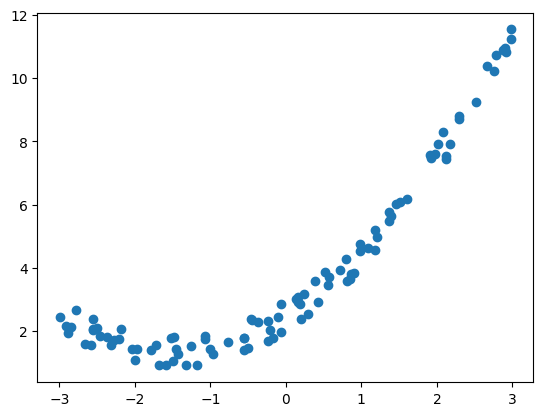

In [24]:
# Create the polynomial data and fit a regression model
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.rand(100,1) 
# quadretic equation used y = 0.5X^2 + 1.5X + 2 + outliers

plt.scatter(X,y)
plt.show()
 

In [25]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
# Fitting a linear regression model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
from sklearn.metrics import r2_score
print('r2:',r2_score(y_test,lm.predict(X_test)))

r2: 0.7696258278637428


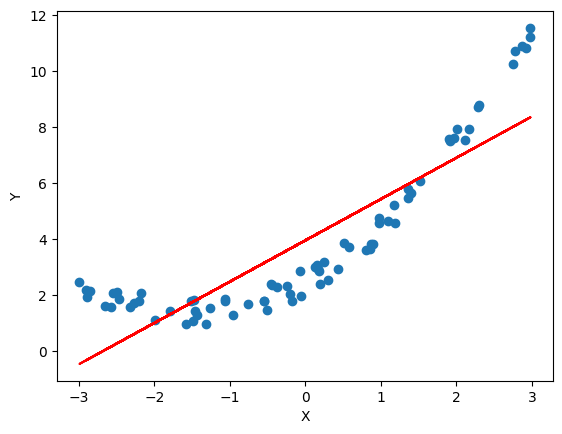

In [28]:
# Visualize the models
plt.scatter(X_train,y_train)
plt.plot(X_train,lm.predict(X_train),color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [56]:
# Using polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [57]:
# Fitting a linear regression model on new input data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train_poly,y_train)
y_pred = lm.predict(X_test_poly)

print('r2:',r2_score(y_test,y_pred))

r2: 0.9888607446153362


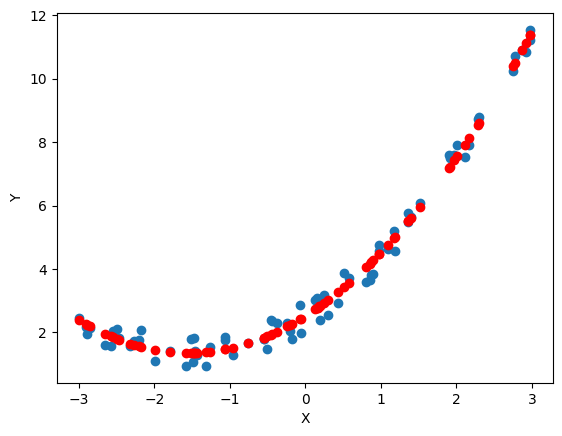

In [58]:
# Visualize the models
plt.scatter(X_train,y_train)
plt.scatter(X_train,lm.predict(X_train_poly),color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [59]:
# Prediction on new data set
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

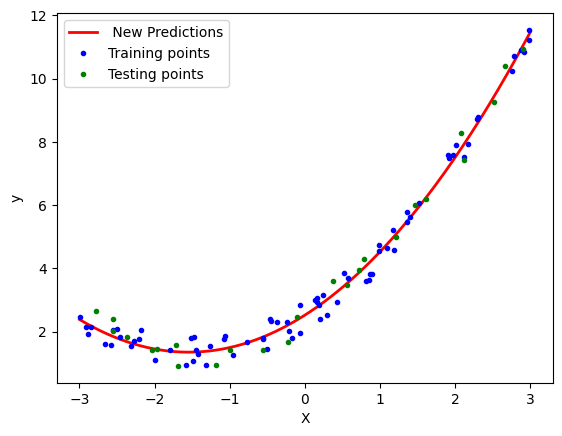

In [63]:
y_new = lm.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts 

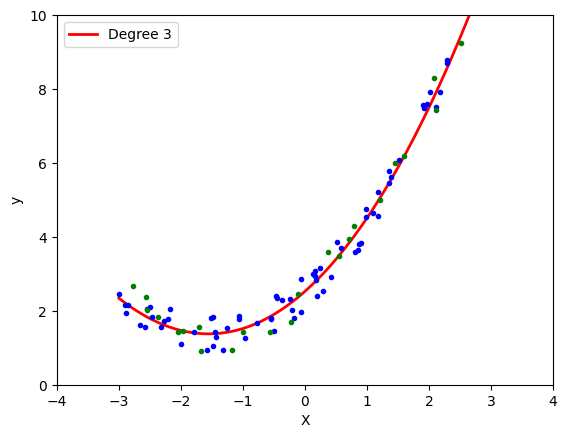

In [72]:
from sklearn.pipeline import Pipeline

def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

poly_regression(3)